# Data Immersion Task 6.5

# Contents

1. Import data libraries
2. Elbow technique
3. K-Means clustering

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
#Make sure matplotlib visuals will appear in notebook

%matplotlib inline

In [3]:
#Define path

path = r'C:\Users\avamk\Happiness Report Analysis'

In [4]:
#Import World Happiness Report data for 2019

df_2019 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'WHR_2019_checked.csv'))

In [5]:
#Create a subset of the 2019 data to include only 6 key variables and the Happiness Score

df_19sub = df_2019[['Happiness Score', 'Economy (GDP per Capita)', 'Social Support', 'Health (Life Expectancy)', 'Freedom', 'Perception of Corruption', 'Generosity']]

I don't find it necessary to rename columns, I made them consistent and simple when I conducted my orginal data cleaning. The scales of the data should be okay as all values are under 8.

# 2. The elbow technique

In [6]:
#Define range of potential clusters

num_cl = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [7]:
#Apply k-means algorithm

score = [kmeans[i].fit(df_19sub).score(df_19sub) for i in range(len(kmeans))]

C:\Users\avamk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\avamk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\avamk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\avamk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [8]:
score

[-245.52197948717952,
 -90.92067403862023,
 -55.320245798128006,
 -40.31194566669306,
 -29.835983780239363,
 -26.195111158645275,
 -24.244263856363304,
 -22.422806106573166,
 -21.033136833583082]

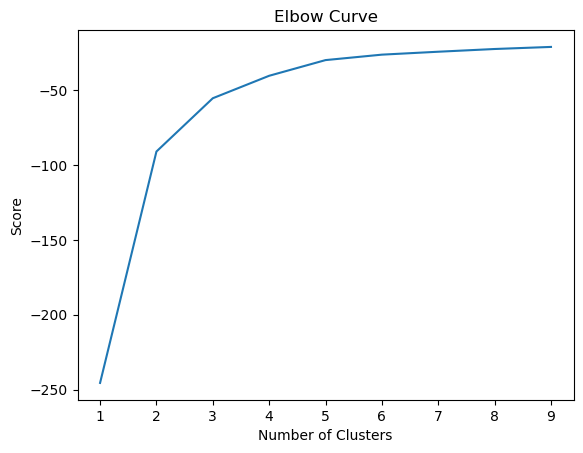

In [9]:
#Plot the elbow curve using PyLab

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There is a large jump between 2 and 3, and then it gradually rises and plateaus. Due to this, the optimal count for clusters is 3.

# 3. K-Means clustering

In [10]:
#Create the k-means object

kmeans = KMeans(n_clusters=3)

In [11]:
#Fit the k-means object to the data

kmeans.fit(df_19sub)

C:\Users\avamk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\avamk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [12]:
#Create column for clusters

df_19sub['Clusters'] = kmeans.fit_predict(df_19sub)

C:\Users\avamk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\avamk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\avamk\AppData\Local\Temp\ipykernel_16208\3077604950.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_19sub['Clusters'] = kmeans.fit_predict(df_19sub)


In [13]:
df_19sub.head()

,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom,Perception of Corruption,Generosity,Clusters
0,7.77,1.34,1.59,0.99,0.60,0.39,0.15,1
1,7.60,1.38,1.57,1.00,0.59,0.41,0.25,1
2,7.55,1.49,1.58,1.03,0.60,0.34,0.27,1
3,7.49,1.38,1.62,1.03,0.59,0.12,0.35,1
4,7.49,1.40,1.52,1.00,0.56,0.30,0.32,1


In [14]:
df_19sub['Clusters'].value_counts()

0    67
2    59
1    30
Name: Clusters, dtype: int64

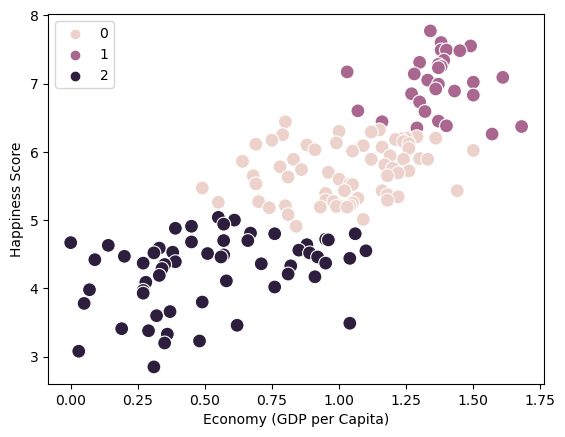

In [15]:
kmean_2019_plot = sns.scatterplot(x=df_19sub['Economy (GDP per Capita)'], y=df_19sub['Happiness Score'], hue=kmeans.labels_, s=100)

In [16]:
#Export plot to project folder

kmean_2019_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'kmean19_hap_econ.png'))

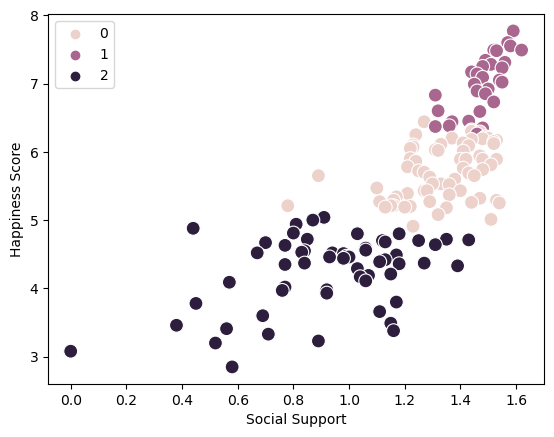

In [17]:
kmean_2019_plot2 = sns.scatterplot(x=df_19sub['Social Support'], y=df_19sub['Happiness Score'], hue=kmeans.labels_, s=100)

In [18]:
#Export plot to project folder

kmean_2019_plot2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'kmean19_hap_soc.png'))

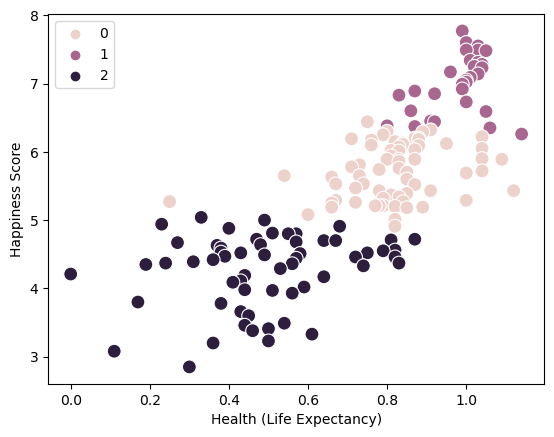

In [19]:
kmean_2019_plot3 = sns.scatterplot(x=df_19sub['Health (Life Expectancy)'], y=df_19sub['Happiness Score'], hue=kmeans.labels_, s=100)

In [20]:
#Export plot to project folder

kmean_2019_plot3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'kmean19_hap_health.png'))

When looking at all three variables, the clusters make sense. Like in previous tasks, each have a strong positive relationship with the Happiness Score and I think that it continues to show the impact that the Economy, Social Support, and Health variables have on the Happiness Score of a country.

In [21]:
#Calculate descriptive statistics of the clusters

df_19sub.groupby('Clusters').agg({'Happiness Score':['mean', 'median'],
                                 'Economy (GDP per Capita)':['mean', 'median'],
                                 'Social Support':['mean', 'median'],
                                 'Health (Life Expectancy)':['mean', 'median']})

Happiness Score        Economy (GDP per Capita)         \
                    mean median                     mean median   
Clusters                                                          
0               5.707612  5.720                 1.025970   1.04   
1               6.997000  7.035                 1.369667   1.37   
2               4.258814  4.420                 0.532034   0.49   

         Social Support        Health (Life Expectancy)         
                   mean median                     mean median  
Clusters                                                        
0              1.332836  1.350                 0.817463   0.82  
1              1.480000  1.485                 0.981667   1.00  
2              0.931864  0.980                 0.492542   0.49

After looking at the statistics I found it interesting that Social Support in cluster 2 had the highest number over Economy, which I have been thinking is the biggest influencing factor. I also noticed that for most variables the mean and the median were very similar. Moving forward, I would like to further explore the reason Social Support has higher scores and see if I can find any results that would influence my hypothesis.